**This is a sample code for giving you and idea on how to convert a text file to a NetworkX graph**

We have used the novel "Merchant of Venice" for this example , make sure you pick a different one.

google collab formalities :)

import necessary modules

In [63]:
!wget https://www.gutenberg.org/cache/epub/228/pg228.txt

--2024-09-10 07:29:35--  https://www.gutenberg.org/cache/epub/228/pg228.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746807 (729K) [text/plain]
Saving to: ‘pg228.txt’

pg228.txt           100%[===================>] 729.30K  --.-KB/s    in 0.08s   

2024-09-10 07:29:35 (9.26 MB/s) - ‘pg228.txt’ saved [746807/746807]



In [64]:
import networkx as nx
import matplotlib.pyplot as plt

Copy your file path, to open and read the file

(make sure the file is uploaded everytime you open colab)

In [65]:
# read the text file (merchant of venice) saved in mov.txt
path = '/content/pg228.txt'
with open(f'{path}', 'r') as f:
    text = f.read()

## Part - 1

### a. Pick your top characters and list them

In [66]:
characters = [
    "Aeneas",            # The Trojan hero and protagonist of the epic
    "Dido",              # The queen of Carthage who falls in love with Aeneas
    "Turnus",            # The Rutulian leader and Aeneas's chief antagonist
    "Juno",              # The queen of the gods who opposes Aeneas
    "Venus",             # The goddess of love and Aeneas's mother
    "Jupiter",           # The king of the gods
    "Neptune",           # The god of the sea
    "Mercury",           # The messenger of the gods
    "Ascanius",          # Aeneas's son
    "Anchises",          # Aeneas's father
    "Creusa",            # Aeneas's wife, who dies during the fall of Troy
    "Laocoön",           # A Trojan priest who warns against the wooden horse
    "Priam",             # The king of Troy
    "Hector",            # A Trojan prince and warrior, killed by Achilles
    "Achilles",          # The Greek hero whose ghost appears in the underworld
    "Turnus's Sister",   # A minor character related to Turnus
    "Amata",             # The wife of Latinus and mother of Lavinia
    "Lavinia",           # The daughter of Latinus, whom Aeneas marries
    "Latinus",           # The king of the Latins and father of Lavinia
    "Pallas",            # The young ally of Aeneas, killed by Turnus
    "Evander",           # The king of Pallanteum, an ally of Aeneas
    "Camilla",           # The warrior queen of the Volscians, allied with Turnus
    "Nisus",             # A Trojan warrior who undertakes a dangerous mission
    "Euryalus",          # Nisus's companion, who also participates in the mission
    "Sybil",             # The priestess of Apollo who guides Aeneas to the underworld
    "Mimnermus",         # A minor character involved in the epic's events
    "Tarchon",           # An ally of Aeneas, leader of the Etruscans
    "Sergestus",         # A minor Trojan figure who aids Aeneas
]


# replace the names of characters with the names in the list (Duke of Venice --> Duke_of_Venice)
for i in range(len(characters)):
    text = text.replace(characters[i], characters[i].replace(' ', '_'))

# split the text into sentences
sentences = text.split('.')

# remove the last element of the list as it is empty
sentences = sentences[:-1]

### b. Forming the graph

In [67]:
# using co-occurrence algorithm to find the co-occurrence of characters in the sentences
co_occurrence = []

for i in range(len(sentences)):
    for j in range(len(characters)):
        if characters[j] in sentences[i]:
            for k in range(len(characters)):
                if characters[k] in sentences[i] and characters[j] != characters[k]:
                    co_occurrence.append((characters[j], characters[k]))

# create a graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(characters)

# add edges to the graph
G.add_edges_from(co_occurrence)

# find number of nodes and edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

# summary of the graph
print(str(G))

Number of nodes: 28
Number of edges: 68
Graph with 28 nodes and 68 edges


In [68]:
# write the graph to a file
nx.write_gexf(G, 'graph.gexf')

# save preprocessed text to a file (you can preprocess differently if you want/need to)
with open(f'preprocessed.txt', 'w') as f:
    f.write(text)

In [69]:
co_occurrence

[('Venus', 'Jupiter'),
 ('Jupiter', 'Venus'),
 ('Jupiter', 'Mercury'),
 ('Mercury', 'Jupiter'),
 ('Dido', 'Venus'),
 ('Venus', 'Dido'),
 ('Aeneas', 'Lavinia'),
 ('Lavinia', 'Aeneas'),
 ('Dido', 'Juno'),
 ('Juno', 'Dido'),
 ('Priam', 'Achilles'),
 ('Achilles', 'Priam'),
 ('Hector', 'Achilles'),
 ('Achilles', 'Hector'),
 ('Aeneas', 'Sergestus'),
 ('Sergestus', 'Aeneas'),
 ('Aeneas', 'Venus'),
 ('Aeneas', 'Anchises'),
 ('Venus', 'Aeneas'),
 ('Venus', 'Anchises'),
 ('Anchises', 'Aeneas'),
 ('Anchises', 'Venus'),
 ('Aeneas', 'Priam'),
 ('Priam', 'Aeneas'),
 ('Juno', 'Venus'),
 ('Juno', 'Ascanius'),
 ('Venus', 'Juno'),
 ('Venus', 'Ascanius'),
 ('Ascanius', 'Juno'),
 ('Ascanius', 'Venus'),
 ('Dido', 'Juno'),
 ('Juno', 'Dido'),
 ('Priam', 'Hector'),
 ('Priam', 'Achilles'),
 ('Hector', 'Priam'),
 ('Hector', 'Achilles'),
 ('Achilles', 'Priam'),
 ('Achilles', 'Hector'),
 ('Venus', 'Hector'),
 ('Hector', 'Venus'),
 ('Priam', 'Hector'),
 ('Hector', 'Priam'),
 ('Priam', 'Hector'),
 ('Hector', 'Priam

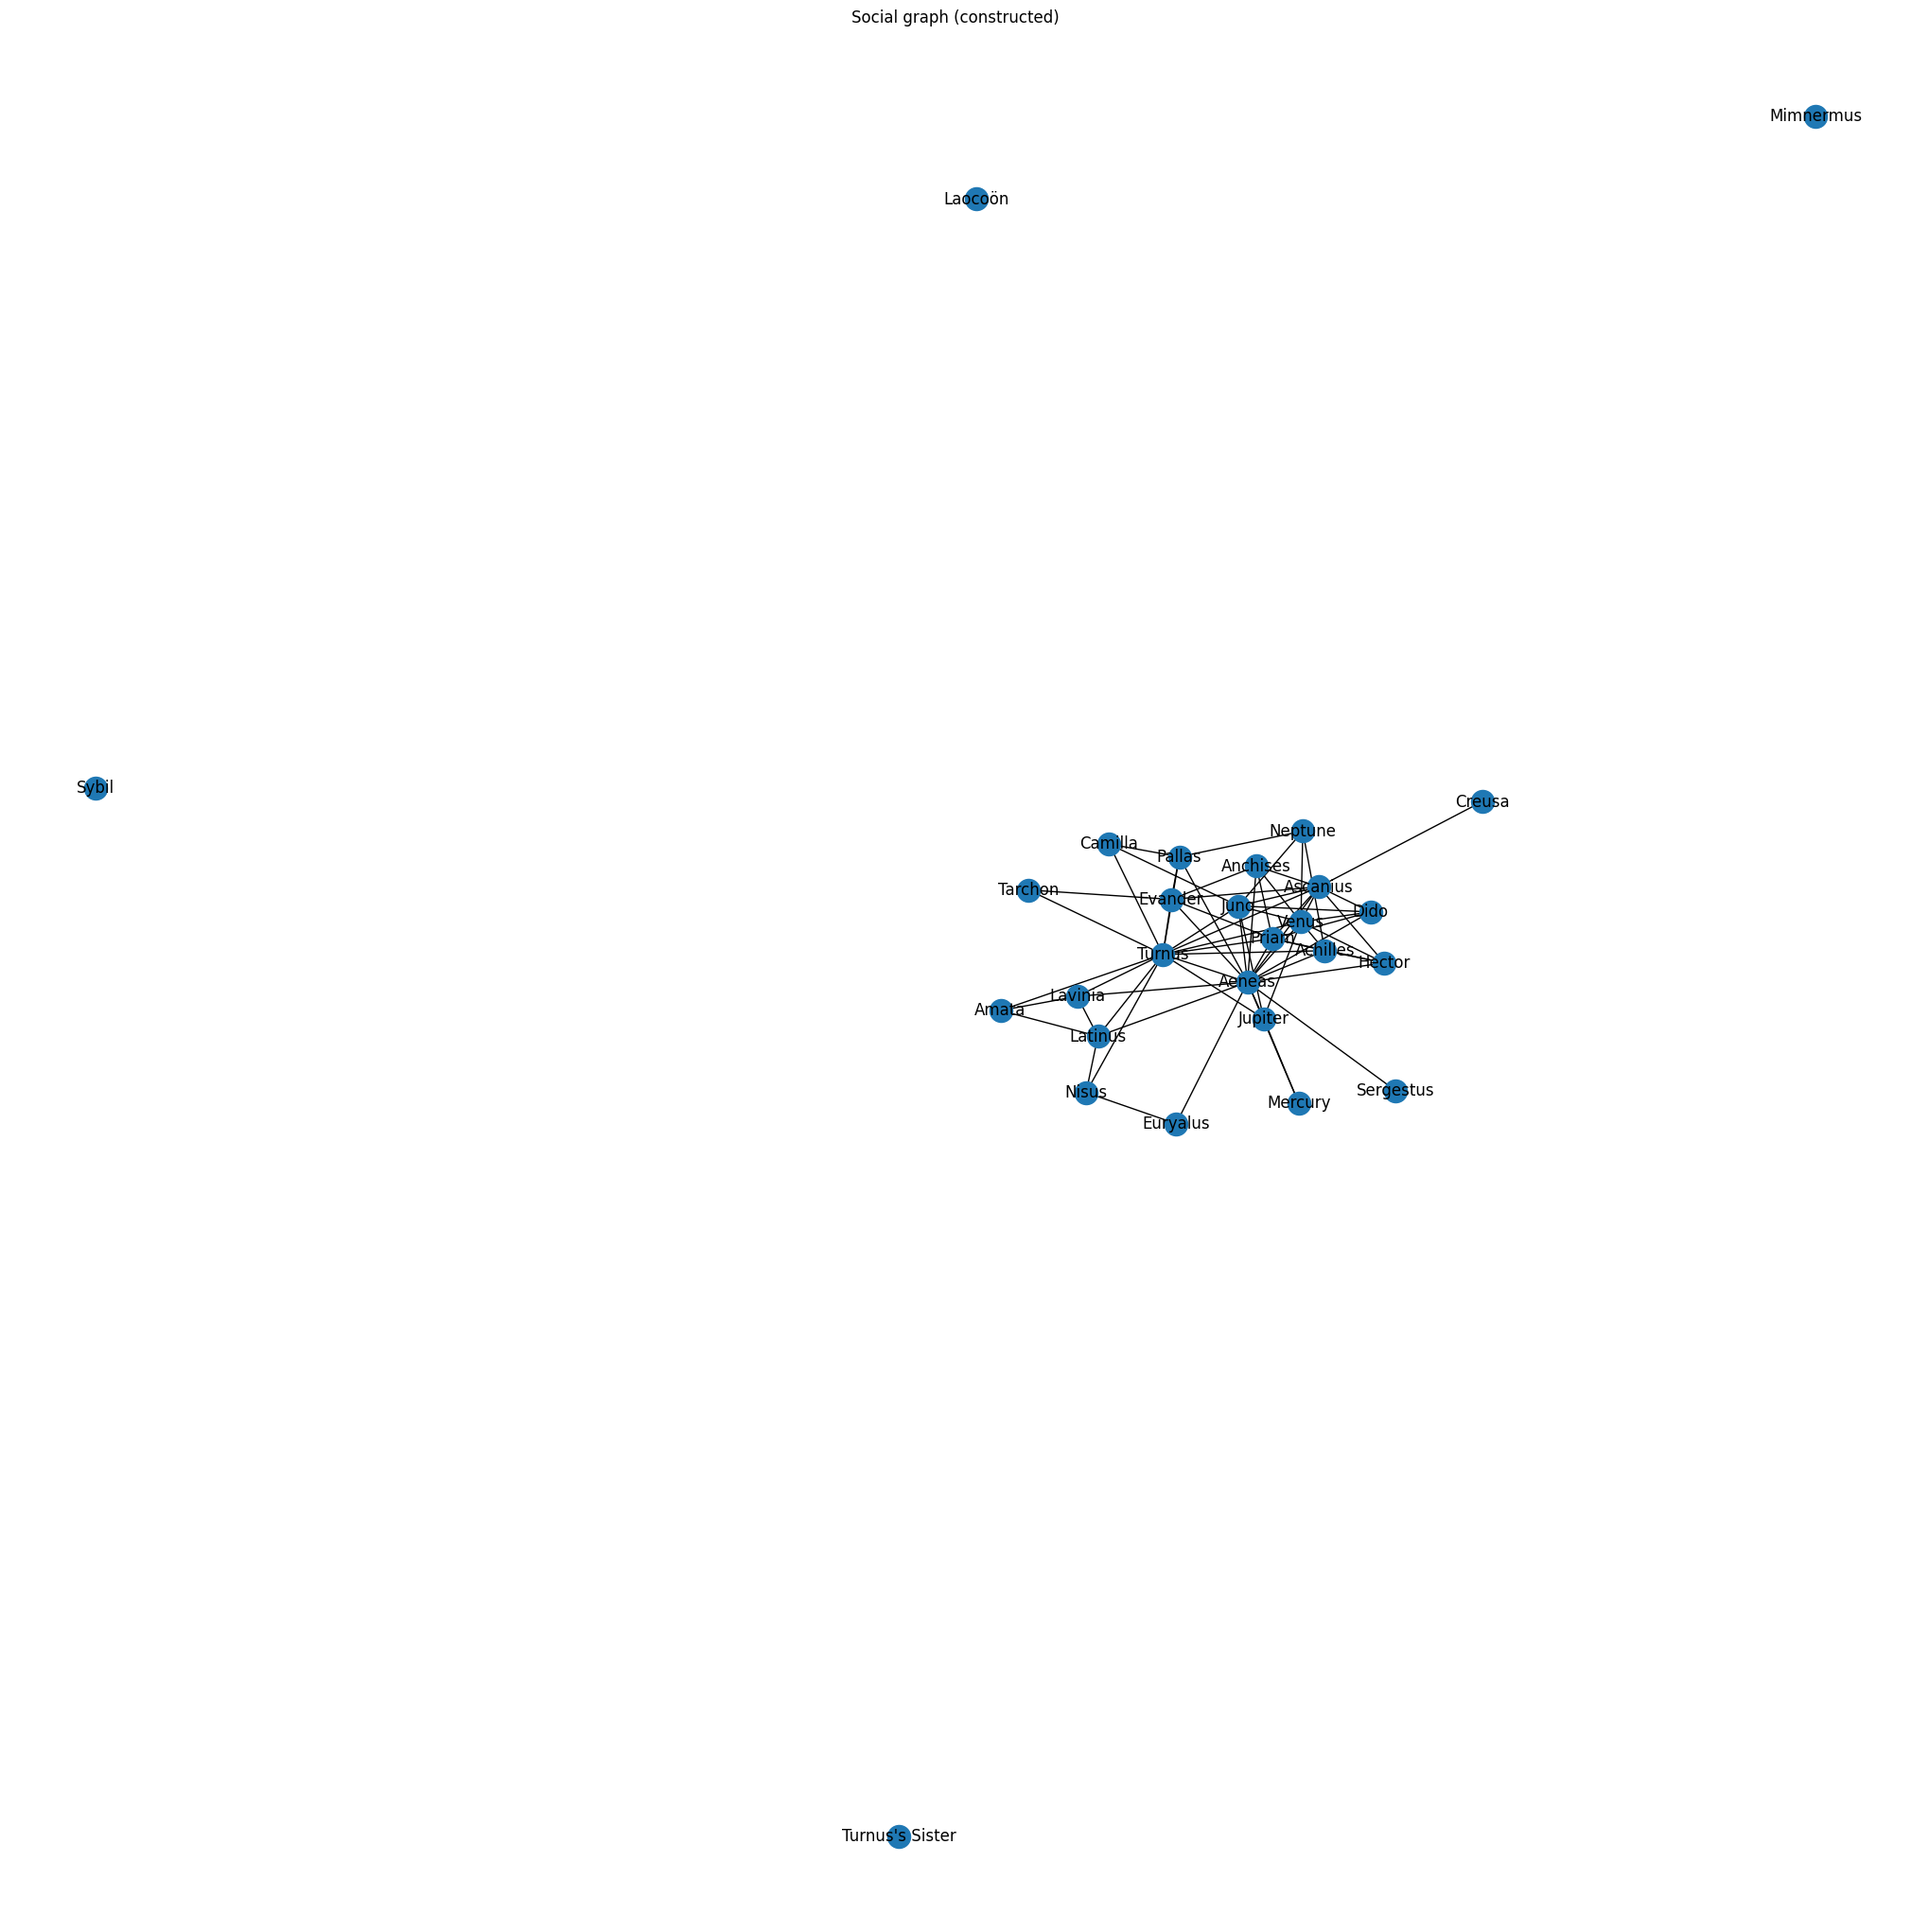

In [70]:
# view graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True)
plt.title("Social graph (constructed)")
plt.show()

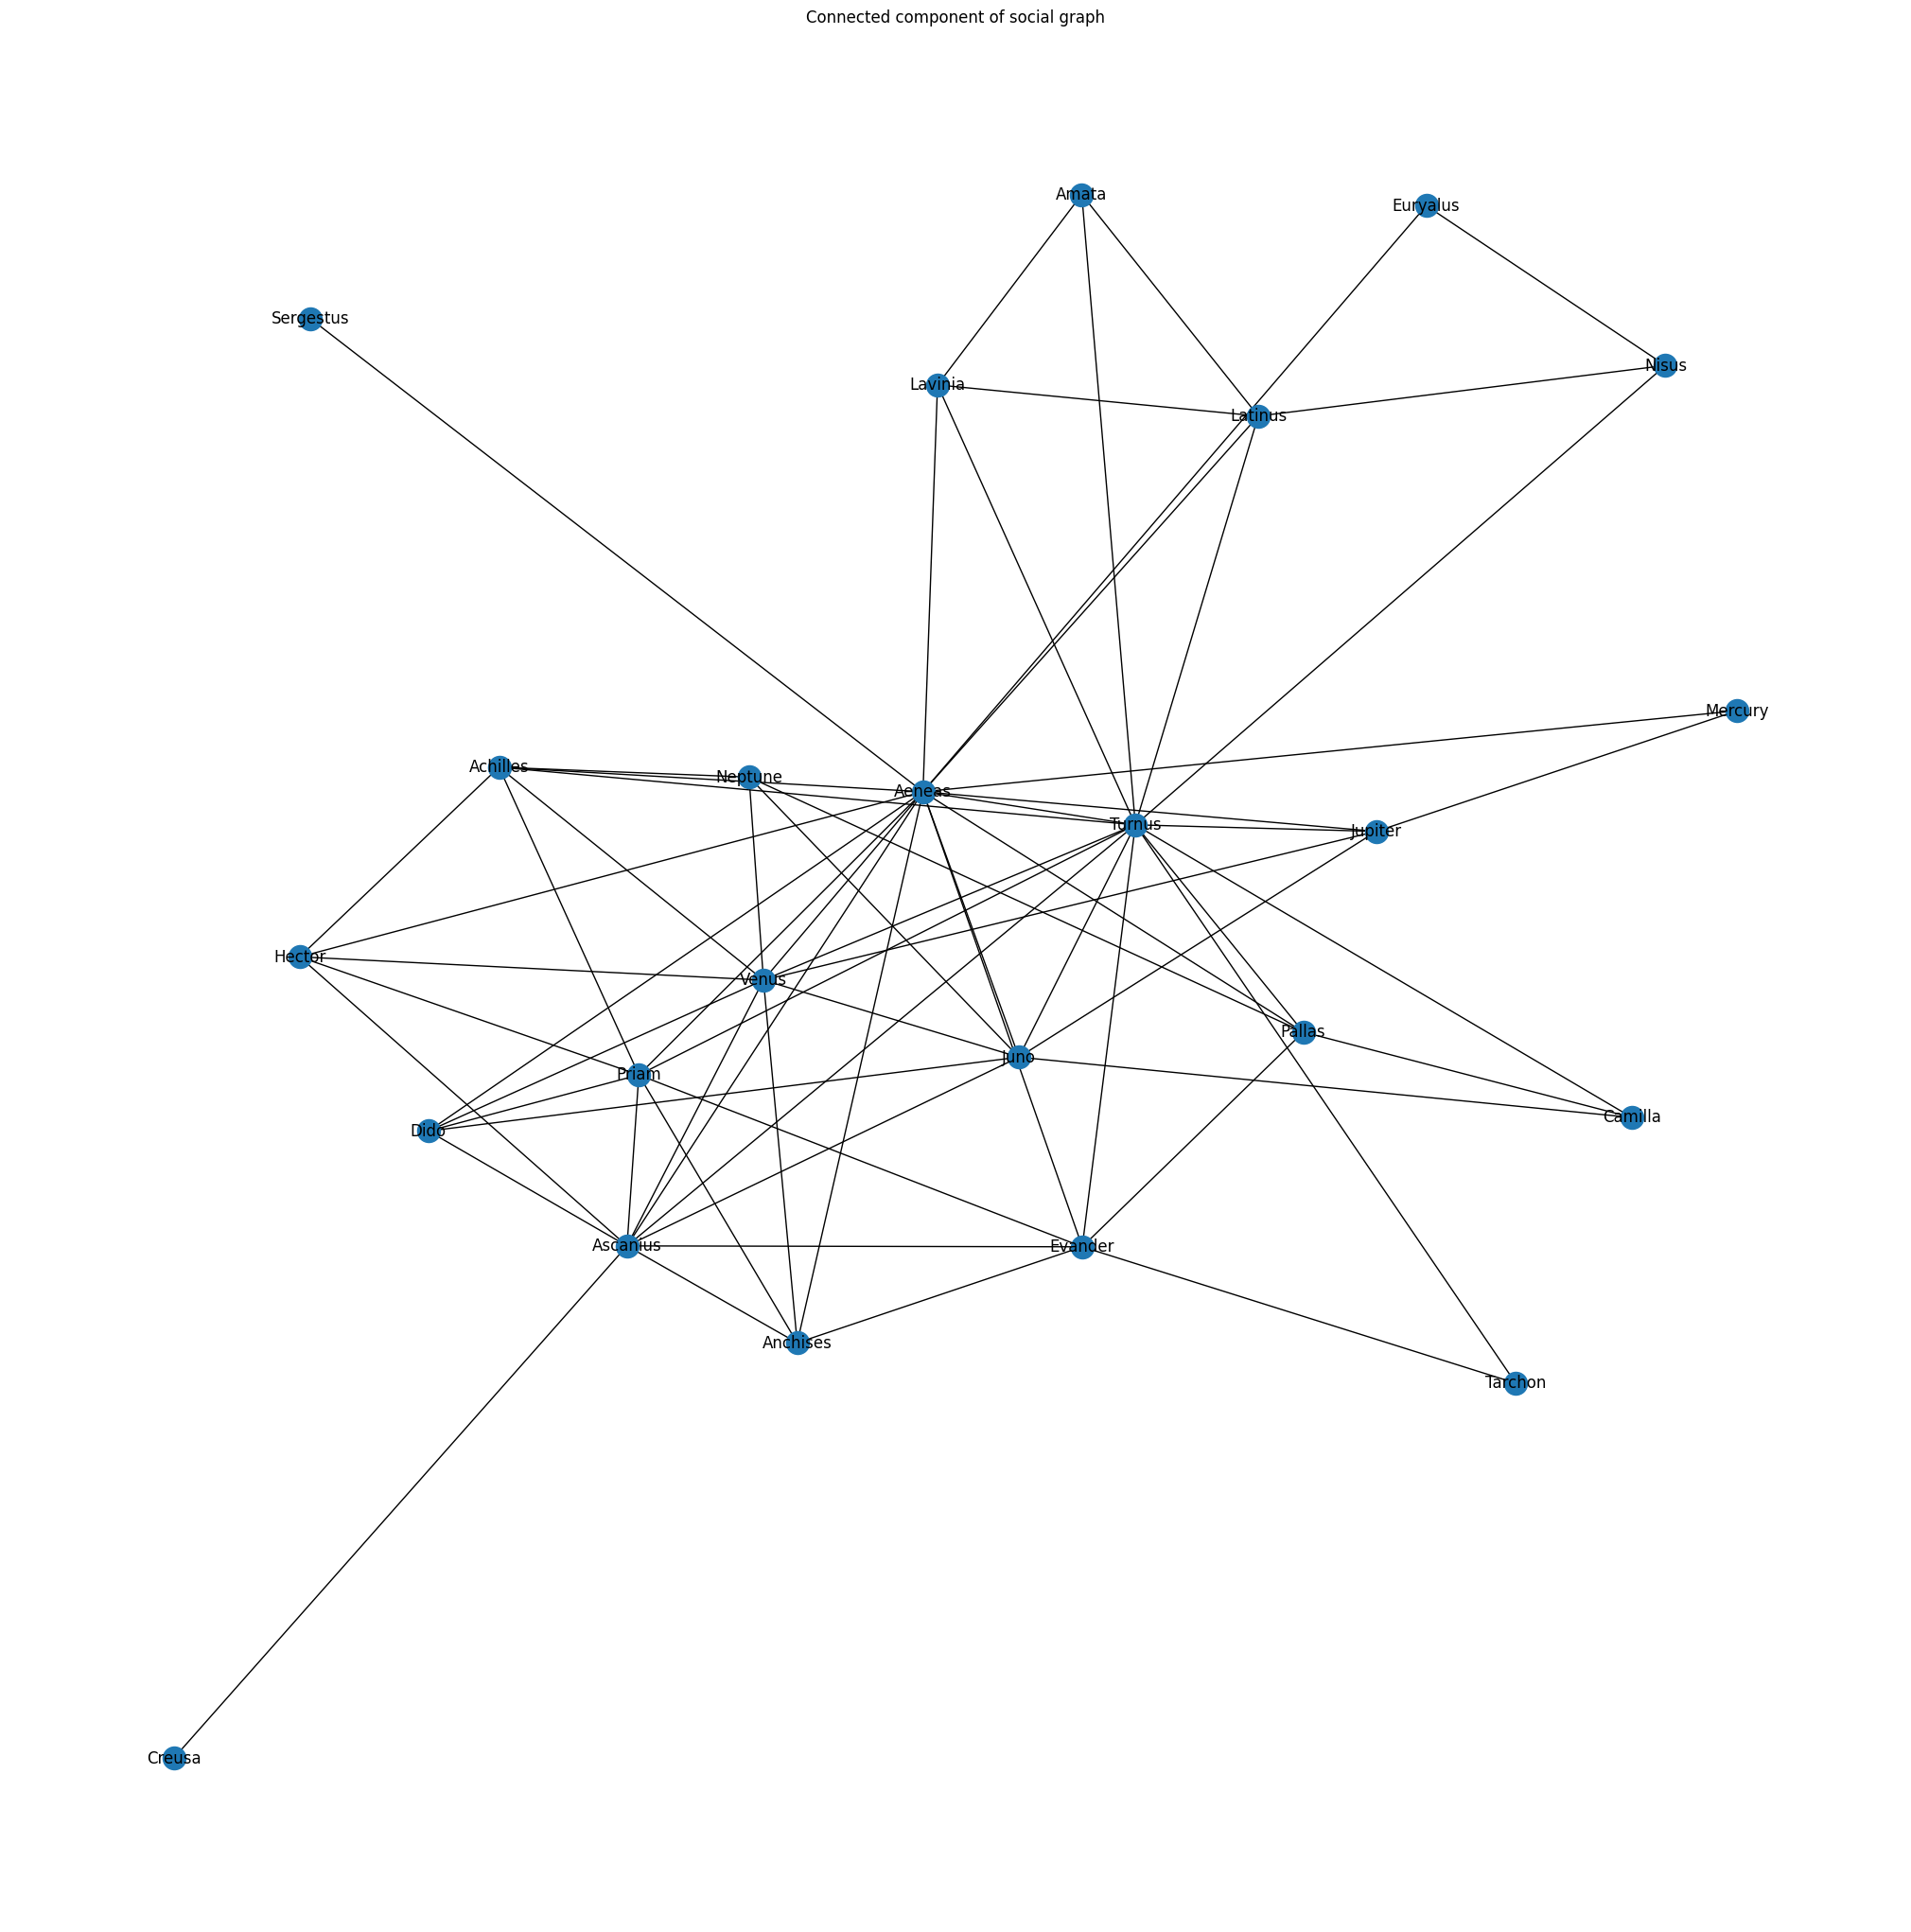

In [71]:
# Get largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph containing only the largest connected component
G_connected = G.subgraph(largest_cc).copy()

# view graph clearly
plt.figure(figsize=(20, 20))
nx.draw(G_connected, with_labels=True)
plt.title("Connected component of social graph")
plt.show()

calculate graph metrics using Networkx API

example:

### c. Centrality

In [ ]:
degree_centrality = nx.degree_centrality(G)

## Part - 2

### Analysis